# 실전 데이터 분석 및 시각화

## 구글 검색 트렌드 분석하기 1

            space x  isPartial
date                          
2020-02-29        1      False
2020-03-01        1      False
2020-03-02        1      False
2020-03-03        1      False
2020-03-04        1      False


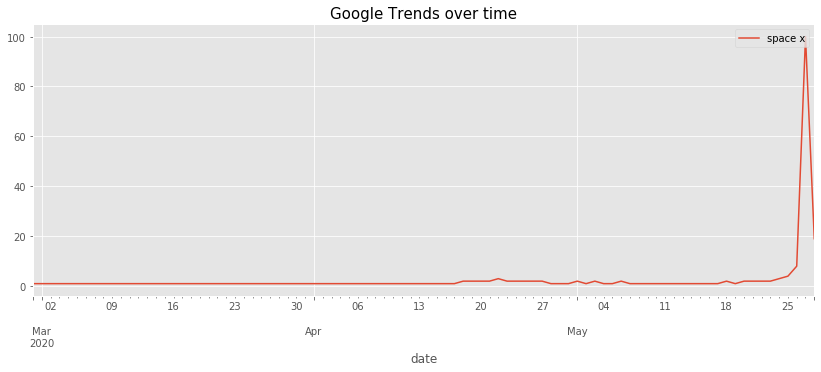

In [10]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import os

keyword = "space x"
period = "today 3-m"   

trend_obj = TrendReq()
trend_obj.build_payload(kw_list=[keyword], timeframe=period)

trend_df = trend_obj.interest_over_time()
print(trend_df.head())

plt.style.use("ggplot")
plt.figure(figsize=(14,5))
trend_df[keyword].plot()
plt.title("Google Trends over time", size=15)
plt.legend(labels=[keyword], loc="upper right")

cwd = os.getcwd()
output_filepath = os.path.join(cwd, ".", "google_trend_over_time_%s.png" % keyword)
plt.savefig(output_filepath, dpi=300)
plt.show()

## 구글 검색 트렌드 분석하기 2

         WHO
geoName     
Uganda   100
Ghana     89
Nigeria   89
Jamaica   75
Kenya     66


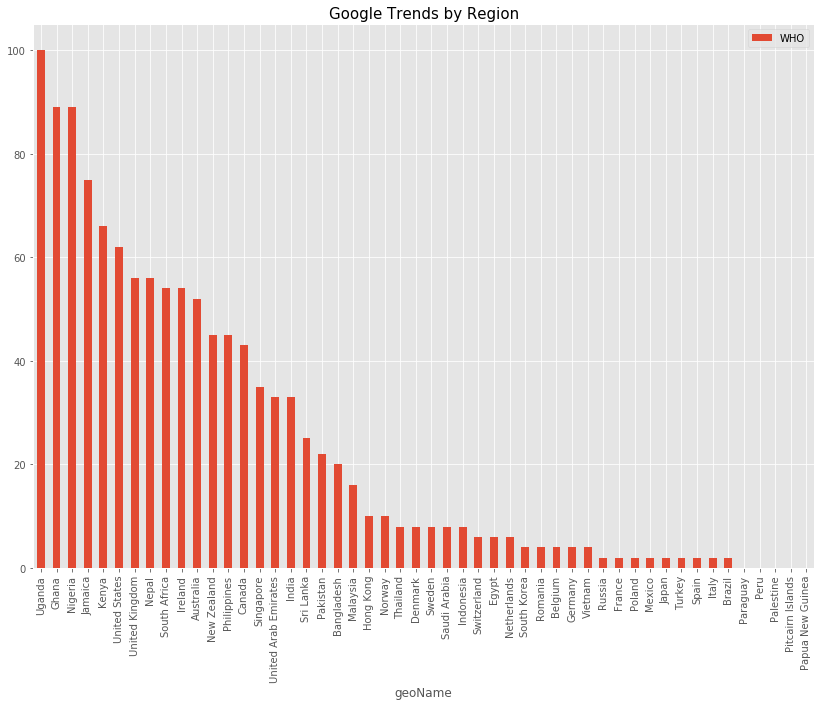

In [13]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import os

keyword = "WHO"
period = "now 7-d"   

trend_obj = TrendReq()
trend_obj.build_payload(kw_list=[keyword], timeframe=period)

trend_df = trend_obj.interest_by_region().sort_values(by='WHO', ascending=False)
print(trend_df.head())

plt.style.use("ggplot")
plt.figure(figsize=(14,10))
trend_df.iloc[:50, :][keyword].plot(kind='bar')
plt.title("Google Trends by Region", size=15)
plt.legend(labels=[keyword], loc="upper right")

cwd = os.getcwd()
output_filepath = os.path.join(cwd, ".", "google_trend_by_region_%s.png" % keyword)
plt.savefig(output_filepath, dpi=300)
plt.show()

## 구글 검색 트렌드 분석하기 3

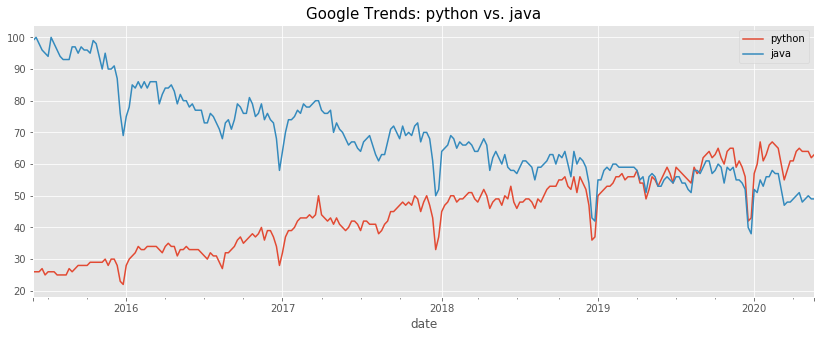

In [18]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import os

keyword1 = "python"
keyword2 = "java"
period = "today 5-y"  

trend_obj = TrendReq()
trend_obj.build_payload(kw_list=[keyword1, keyword2], timeframe=period)  
trend_df = trend_obj.interest_over_time()

plt.style.use("ggplot")
plt.figure(figsize=(14,5))
trend_df[keyword1].plot()
trend_df[keyword2].plot()
plt.title("Google Trends: %s vs. %s" % (keyword1, keyword2), size=15)
plt.legend(loc="best")

cwd = os.getcwd()
output_filepath = os.path.join(cwd, ".", 'google_trend_%s_vs_%s.png' % (keyword1, keyword2))
plt.savefig(output_filepath, dpi=300)
plt.show()

## 구글 검색 트렌드 분석하기 4

[{'mid': '/m/0840w', 'title': 'World Health Organization', 'type': 'Topic'}, {'mid': '/m/01v0sxx', 'title': 'The Who', 'type': 'Rock band'}, {'mid': '/m/02jd7w', 'title': 'Who', 'type': 'Pronoun'}, {'mid': '/m/03l_zp', 'title': 'Jim Neidhart', 'type': 'Professional wrestler'}, {'mid': '/m/07dmyk', 'title': 'WHO (AM)', 'type': 'AM'}]
World Health Organization
                World Health Organization
geoName                                  
Afghanistan                             0
Albania                                 0
Algeria                                 0
American Samoa                          0
Andorra                                 0
                   World Health Organization
geoName                                     
St. Helena                               100
Ethiopia                                  98
Ghana                                     63
Uganda                                    59
Trinidad & Tobago                         59


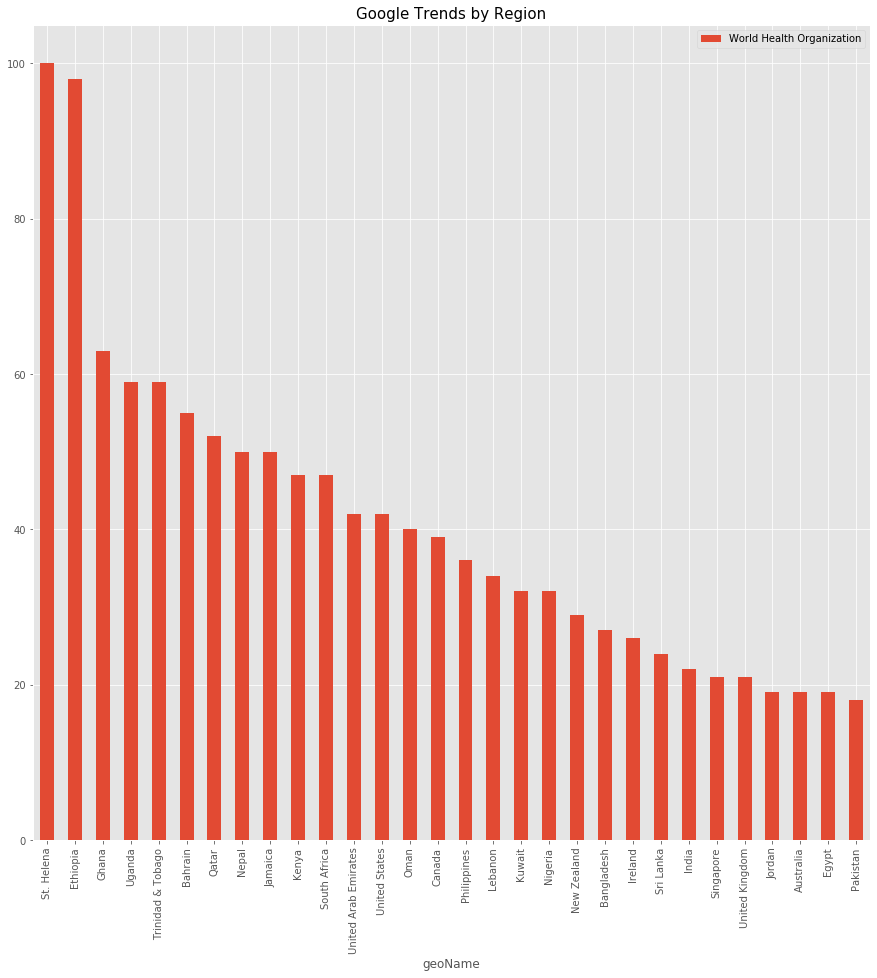

In [21]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import os

trend_obj = TrendReq()

keyword = "WHO"
suggested_keywords = trend_obj.suggestions(keyword)
print(suggested_keywords)

new_keyword = suggested_keywords[0]['title']
print(new_keyword)

period = "now 7-d"   
trend_obj.build_payload(kw_list=[new_keyword], timeframe=period)

trend_df = trend_obj.interest_by_region()
print(trend_df.head())
trend_top30 = trend_df.sort_values(by=new_keyword, ascending=False).head(30)
print(trend_top30.head())

plt.style.use("ggplot")
plt.figure(figsize=(15,15))
trend_top30[new_keyword].plot(kind='bar')
plt.title("Google Trends by Region", size=15)
plt.legend(labels=[new_keyword], loc="upper right")

cwd = os.getcwd()
output_filepath = os.path.join(cwd, ".", "google_trend_by_region_%s.png" % new_keyword)
plt.savefig(output_filepath, dpi=300)
plt.show()

## 구글 검색 트렌드 분석하기 5

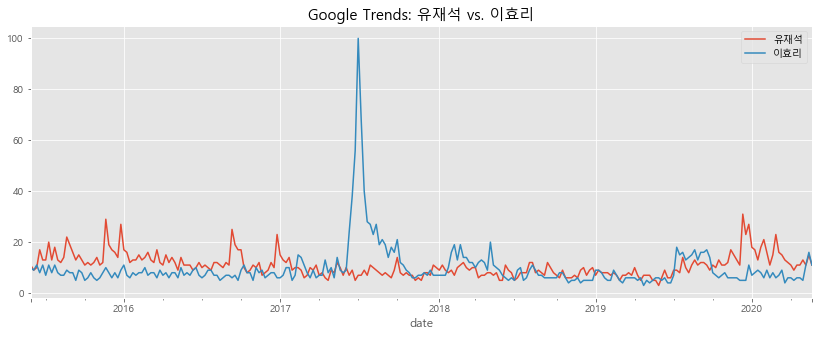

In [23]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
import os

keyword1 = "유재석"
keyword2 = "이효리"
local_area = "KR"
period = "today 5-y"

trend_obj = TrendReq()
trend_obj.build_payload(kw_list=[keyword1, keyword2], timeframe=period, geo=local_area)
trend_df = trend_obj.interest_over_time()

from matplotlib import font_manager, rc
font_path = os.path.join(cwd, ".","malgun.ttf") 
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use("ggplot")
plt.figure(figsize=(14,5))
trend_df[keyword1].plot()
trend_df[keyword2].plot()
plt.title("Google Trends: %s vs. %s" % (keyword1, keyword2), size=15)
plt.legend(loc="best")

cwd = os.getcwd()
output_filepath = os.path.join(cwd, ".", 'google_trend_%s__%s_vs_%s.png' % \
                               (local_area, keyword1, keyword2))
plt.savefig(output_filepath, dpi=300)

plt.show()
